### Models with uncertainty

- reads model parameters and covariance structure from csv
- samples N parameter sets from normal distribution, accounting for covariance among parameter estimates
- plots all realizations, mean (nominal parameters) and +/- std

To calculate uncertainty (+/- std) of National or Regional estimates from mNFI & weather data, Juha suggests:
- sample parameters from distribution, predict NEP, upscale to grid-cell and national level
- repeat N times
- calculate mean of upscaled and std. This assumes only our 'model parameters' affect uncertainty
- for NEP = GPP - ER, similar approach.

Samuli's comment: We what to calculate: 
- mean NEP over Finnish forests in a way that is comparable with GHG-inventory. This means that in upscaling, values of each gridcell i must be weighted by gridcell's contribution to total forest area in Finland. i.e. NEPmean = 1 / sum(area_i)  x sum(NEP_i x area_i). NEP_i in turn must be weighted sums of relative areas of site types etc. within gridcell i.
- we want to show also map of NEP_i over Finland, i.e. NEP per m2
- ... and same for GPP and ER

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from upscale_functions import best_models

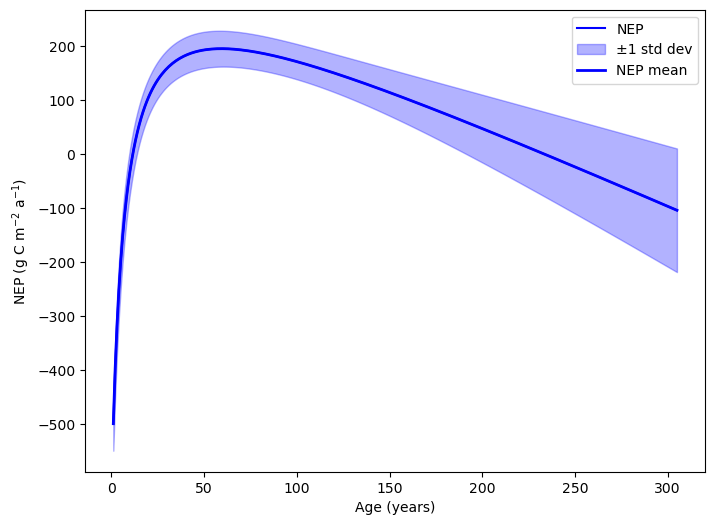

In [2]:
# Example usage
x = np.linspace(1, 305, 305)

nep_m0, std0 = best_models(model='NEP', Age=x, T=5.4, Plant=0)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.plot(x, nep_m0, label='NEP', color='blue')

#for k in range(len(res)):
    #ax.plot(x, res[k], 'k-', alpha=0.01)
ax.fill_between(x, nep_m0 + std0, nep_m0 - std0, color='b', alpha=0.3, label='±1 std dev')
ax.plot(x, nep_m0, 'b-', linewidth=2, label='NEP mean')
ax.set_xlabel('Age (years)')
ax.set_ylabel('NEP (g C m$^{-2}$ a$^{-1}$)')
ax.legend()